In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


*About Dataset*

You want to create your own football club.

Your club don't have a team yet.
Team will require to hire players for their roster.
You wants to make players selection decisions using past data.
Create some reports/kind of things which recommends data backed players for main team

To start with, a total 14-16 players are required.
Collected data contains information about players, clubs they are currently playing for and various performance measures.
NOTE:
As always assume budget for hiring players to be limited, team needs 18-22 possible players to choose from.

Formulating a report will help management/stack-holders make some decision regarding potential players.

# set budget and wage budget
budget = 150000000
wage_budget = 2000000

# Define the ideal squad composition per position max 22 players
ideal_composition = {
    'ST': 2,
    'LW': 2,
    'CM': 3,
    'GK': 2,
    'CB': 3,
    'LB': 2,
    'RB': 2,
    'RM': 2,
    'CF': 1,
    'LAM': 1,
    'RAM': 1,
    'CDM': 1
}

In [2]:
# load dataset
sport_data = pd.read_csv('fifa_eda_stats.csv')

# show data
sport_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# identifying null value percentage
(sport_data.isnull().sum() / len(sport_data)) * 100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys     

In [4]:
# drop column 'loan from', '
sport_data = sport_data.drop(columns='Loaned From')

In [5]:
# impute null value with mode
for col in sport_data.columns:
    sport_data[col].fillna(sport_data[col].mode()[0], inplace=True)

In [ ]:
# check null values
sport_data.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

In [ ]:
# check data info
sport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      18207 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Weak Foot                 18207 non-null  float64
 12  Skill Moves               18207 non-null  float64
 13  Work Rate                 18207 non-null  object 
 14  Body T

In [8]:
sport_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
# Calculate the mode for each relevant column
value_mode = sport_data['Value'].mode()[0]
wage_mode = sport_data['Wage'].mode()[0]

def convert_currency(value, mode):
    """
    Converts a currency value from string to integer.

    Parameters:
    value (str, float, int): The currency value to be converted.
    mode (int): The mode of the column to return when the value is '0'.

    Returns:
    int: The converted currency value as an integer.
 
    Notes:
    If the value is already an integer or float, it will be returned as an integer.
    If the value is a string, it will be stripped of the '€' symbol and spaces, then converted to an integer.
    If the value is '0', it will be returned as the mode of the data column.
    If the value is in the format 'M', it will be converted to an integer by multiplying by 1,000,000.
    If the value is in the format 'K', it will be converted to an integer by multiplying by 1,000.
    If the value cannot be converted, it will be returned as the integer 0.
    """
    if pd.isnull(value):  # Handle NaN values
        return 0

    if isinstance(value, str):
        value = value.replace('€', '').strip()
        if value == '0':
            return mode  # Use pre-calculated mode
        elif 'M' in value:
            return int(float(value.replace('M', '').strip()) * 1000000)
        elif 'K' in value:
            return int(float(value.replace('K', '').strip()) * 1000)
        else:
            try:
                return int(value)
            except ValueError:
                return 0
    elif isinstance(value, (float, int)):
        return int(value)
    else:
        return 0 

In [11]:
# Apply the function to each relevant column, passing the respective mode
sport_data['Value'] = sport_data['Value'].apply(lambda x: convert_currency(x, value_mode))
sport_data['Wage'] = sport_data['Wage'].apply(lambda x: convert_currency(x, wage_mode))

# change data type
sport_data['Value'] = pd.to_numeric(sport_data['Value'])
sport_data['Wage'] = pd.to_numeric(sport_data['Wage'])

In [12]:
sport_data['Value']

0        110500000
1         77000000
2        118500000
3         72000000
4        102000000
           ...    
18202        60000
18203        60000
18204        60000
18205        60000
18206        60000
Name: Value, Length: 18207, dtype: int64

In [13]:
sport_data['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 18207, dtype: int64

In [14]:
sport_data['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release Clause, Length: 18207, dtype: object

In [15]:
sport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      18207 non-null  object 
 7   Value                     18207 non-null  int64  
 8   Wage                      18207 non-null  int64  
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Weak Foot                 18207 non-null  float64
 12  Skill Moves               18207 non-null  float64
 13  Work Rate                 18207 non-null  object 
 14  Body T

In [16]:
# data descriptive statistic
sport_data.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2.425921e+06,9744.548800,1.112924,2.947438,2.360356,19.508046,49.766518,45.583732,52.313176,58.700720,42.925084,55.393750,47.199374,42.860878,52.736420,58.386939,64.625638,64.735596,63.515461,61.844950,63.977207,55.493107,65.102378,63.232548,65.319053,47.141319,55.893063,46.738617,49.979678,53.413028,48.539243,58.651837,47.315154,47.746087,45.704509,16.593508,16.374746,16.220904,16.372055,16.693195
std,29965.244204,4.669943,6.908930,6.136496,5.589846e+06,21993.731064,0.393554,0.659591,0.755394,15.935210,18.351081,19.510510,17.359445,14.682633,17.673827,18.890609,18.379389,17.455763,15.315059,16.668052,14.909785,14.631591,14.748374,9.000041,14.119034,17.227225,11.807138,15.875666,12.541194,19.244778,17.351376,20.684495,19.507633,14.130188,15.684394,11.421258,19.888837,21.655773,21.277553,17.677529,16.887779,16.482524,17.015353,17.934736
min,16.000000,16.000000,46.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,45.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,67.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,56.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,9

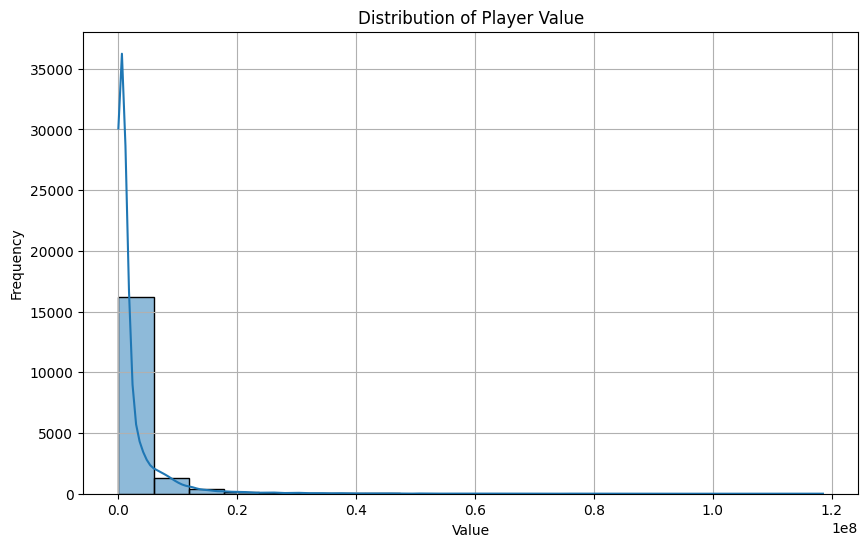

In [17]:
# distribution of players value
plt.figure(figsize=(10, 6))

sns.histplot(sport_data['Value'], bins=20, kde=True)

plt.title('Distribution of Player Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [18]:
# average value by position
average_value_by_position = sport_data.groupby('Position')['Value'].median().reset_index()
average_value_by_position

,Position,Value
0,CAM,925000.0
1,CB,525000.0
2,CDM,700000.0
3,CF,775000.0
4,CM,525000.0
5,GK,375000.0
6,LAM,1700000.0
7,LB,600000.0
8,LCB,1000000.0
9,LCM,1100000.0


C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\1702257911.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_value_by_position, x='Position', y='Value', palette='viridis', ci=None)
C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\1702257911.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_value_by_position, x='Position', y='Value', palette='viridis', ci=None)


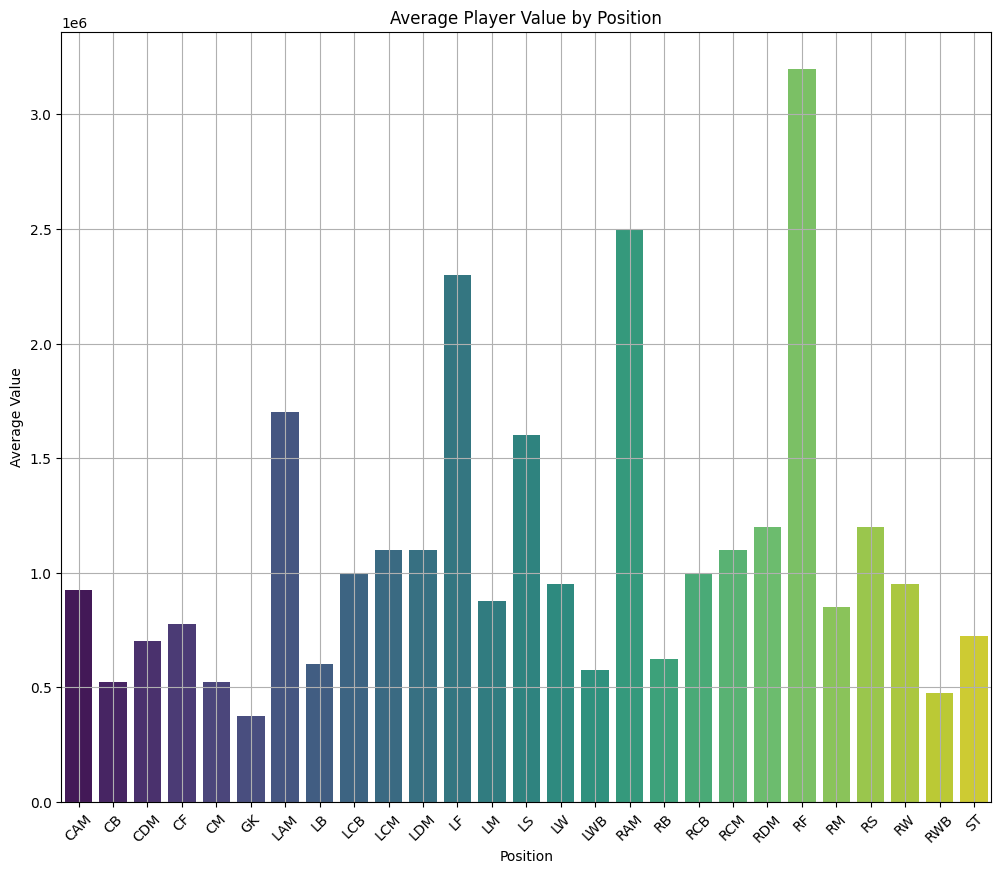

In [20]:
# plot
plt.figure(figsize=(12, 10))

sns.barplot(data=average_value_by_position, x='Position', y='Value', palette='viridis', ci=None)

plt.title('Average Player Value by Position')
plt.xlabel('Position')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(True)

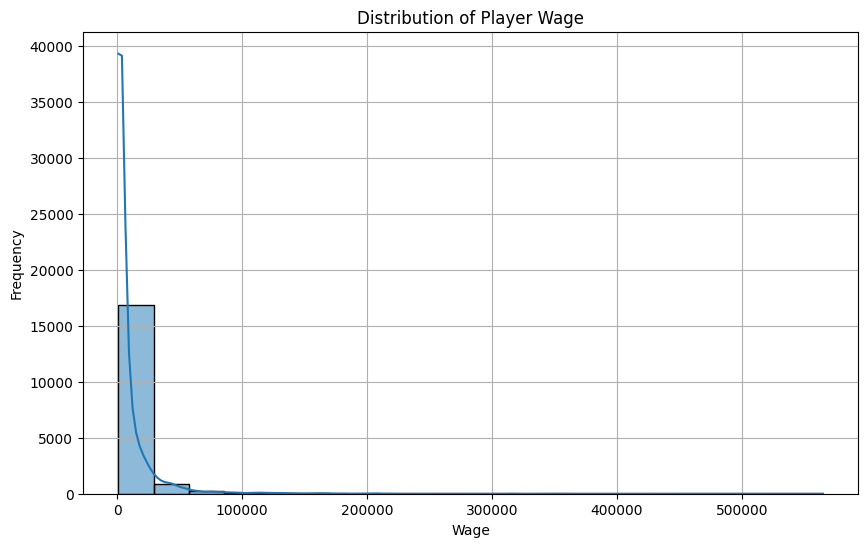

In [21]:
# distribution of players wage
plt.figure(figsize=(10, 6))

sns.histplot(sport_data['Wage'], bins=20, kde=True)

plt.title('Distribution of Player Wage')
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [22]:
# average wage by position
average_wage_by_position = sport_data.groupby('Position')['Wage'].median().reset_index()
average_wage_by_position

,Position,Wage
0,CAM,3000.0
1,CB,2000.0
2,CDM,3000.0
3,CF,3000.0
4,CM,2000.0
5,GK,2000.0
6,LAM,10000.0
7,LB,3000.0
8,LCB,4000.0
9,LCM,5000.0


C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3396878914.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_wage_by_position, x='Position', y='Wage', palette='viridis', ci=None)
C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3396878914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_wage_by_position, x='Position', y='Wage', palette='viridis', ci=None)


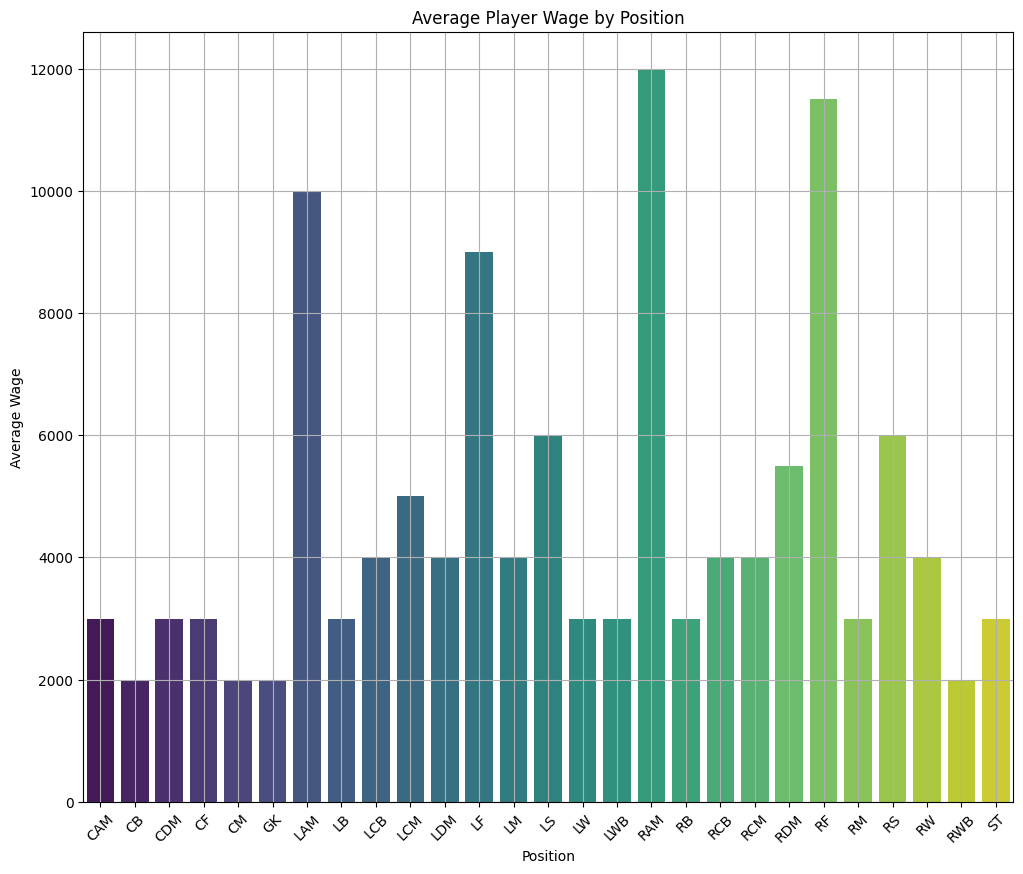

In [23]:
# plot
plt.figure(figsize=(12, 10))

sns.barplot(data=average_wage_by_position, x='Position', y='Wage', palette='viridis', ci=None)

plt.title('Average Player Wage by Position')
plt.xlabel('Position')
plt.ylabel('Average Wage')
plt.xticks(rotation=45)
plt.grid(True)

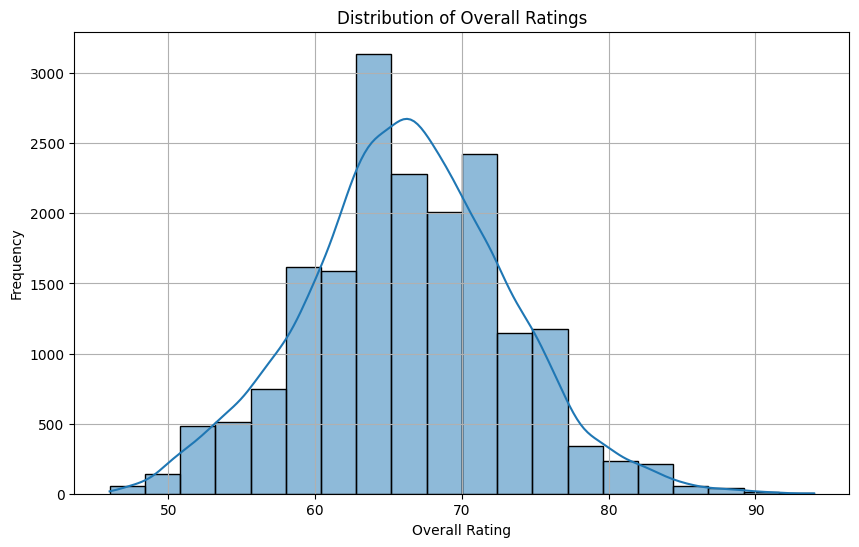

In [24]:
# Distribution of Overall Ratings
plt.figure(figsize=(10, 6))
sns.histplot(sport_data['Overall'], bins=20, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [25]:
# Average Overall Rating by Position
avg_overall_by_position = sport_data.groupby('Position')['Overall'].mean().reset_index()

# show data
avg_overall_by_position

,Position,Overall
0,CAM,66.903967
1,CB,65.024747
2,CDM,66.313291
3,CF,65.824324
4,CM,63.729555
5,GK,64.603457
6,LAM,71.857143
7,LB,65.854766
8,LCB,69.240741
9,LCM,69.270886


C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\4019624113.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_overall_by_position, x='Position', y='Overall', palette='viridis', ci=None)
C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\4019624113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_overall_by_position, x='Position', y='Overall', palette='viridis', ci=None)


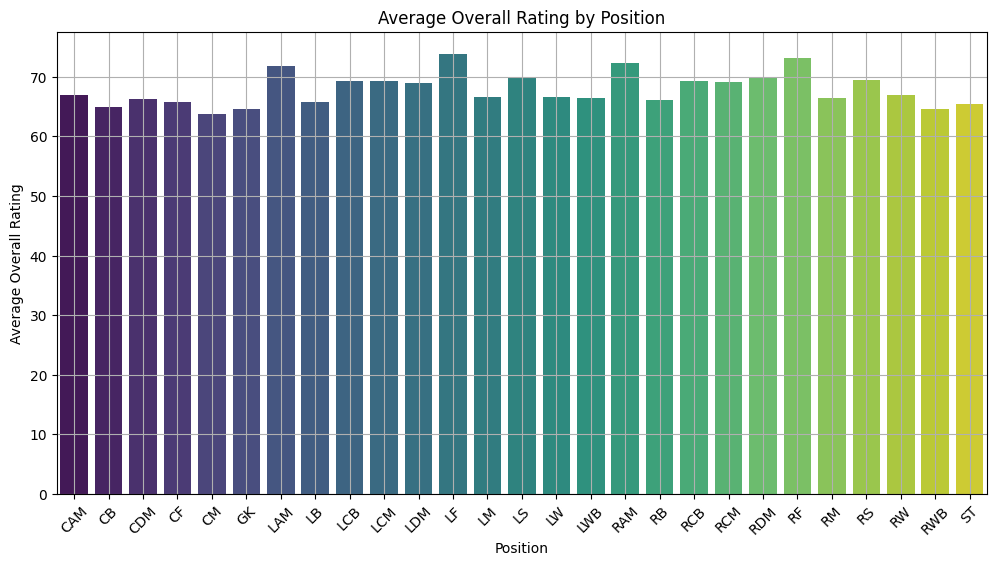

In [26]:
plt.figure(figsize=(12, 6))

sns.barplot(data=avg_overall_by_position, x='Position', y='Overall', palette='viridis', ci=None)

plt.title('Average Overall Rating by Position')
plt.xlabel('Position')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

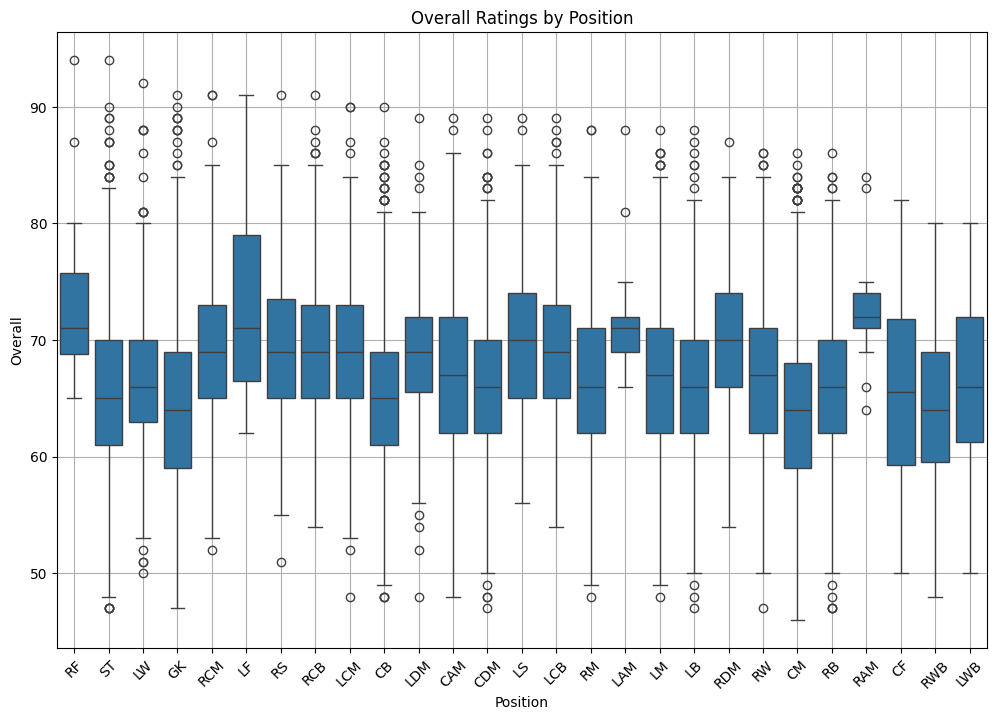

In [27]:
# Boxplot of Overall Ratings by Position
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Overall', data=sport_data)
plt.title('Overall Ratings by Position')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [28]:
# Top Players by Overall Rating
top_players = sport_data.sort_values(by='Overall', ascending=False).head(20)
top_players[['Name', 'Position', 'Overall', 'Value', 'Wage']]

,Name,Position,Overall,Value,Wage
0,L. Messi,RF,94,110500000,565000
1,Cristiano Ronaldo,ST,94,77000000,405000
2,Neymar Jr,LW,92,118500000,290000
3,De Gea,GK,91,72000000,260000
4,K. De Bruyne,RCM,91,102000000,355000
5,E. Hazard,LF,91,93000000,340000
6,L. Modrić,RCM,91,67000000,420000
7,L. Suárez,RS,91,80000000,455000
8,Sergio Ramos,RCB,91,51000000,380000
12,D. Godín,CB,90,44000000,125000


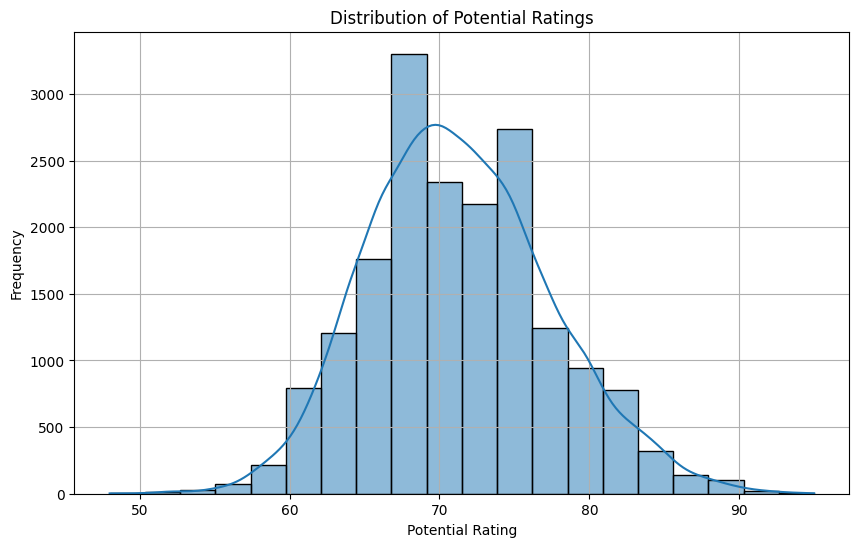

In [29]:
# Distribution of Potential Ratings
plt.figure(figsize=(10, 6))
sns.histplot(sport_data['Potential'], bins=20, kde=True)
plt.title('Distribution of Potential Ratings')
plt.xlabel('Potential Rating')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [30]:
# Average Overall Rating by Position
avg_potential_by_position = sport_data.groupby('Position')['Potential'].mean().reset_index()

# show data
avg_potential_by_position

,Position,Potential
0,CAM,72.639875
1,CB,70.907762
2,CDM,71.504219
3,CF,72.743243
4,CM,70.905308
5,GK,69.799012
6,LAM,72.523810
7,LB,70.518154
8,LCB,72.308642
9,LCM,72.784810


C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\4228097439.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_potential_by_position, x='Position', y='Potential', palette='viridis', ci=None)
C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\4228097439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_potential_by_position, x='Position', y='Potential', palette='viridis', ci=None)


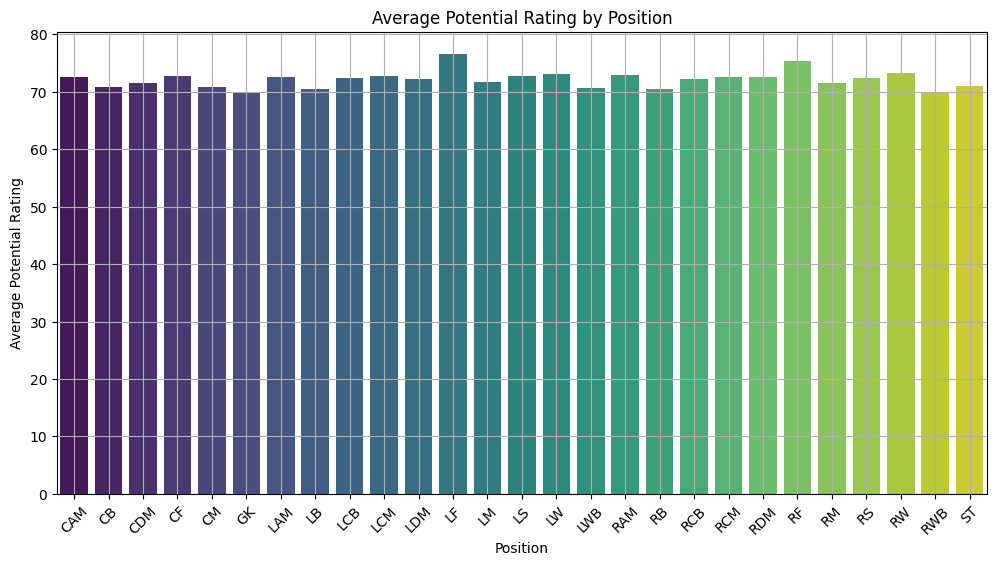

In [31]:
# plot
plt.figure(figsize=(12, 6))

sns.barplot(data=avg_potential_by_position, x='Position', y='Potential', palette='viridis', ci=None)

plt.title('Average Potential Rating by Position')
plt.xlabel('Position')
plt.ylabel('Average Potential Rating')
plt.xticks(rotation=45)
plt.grid()
plt.show()

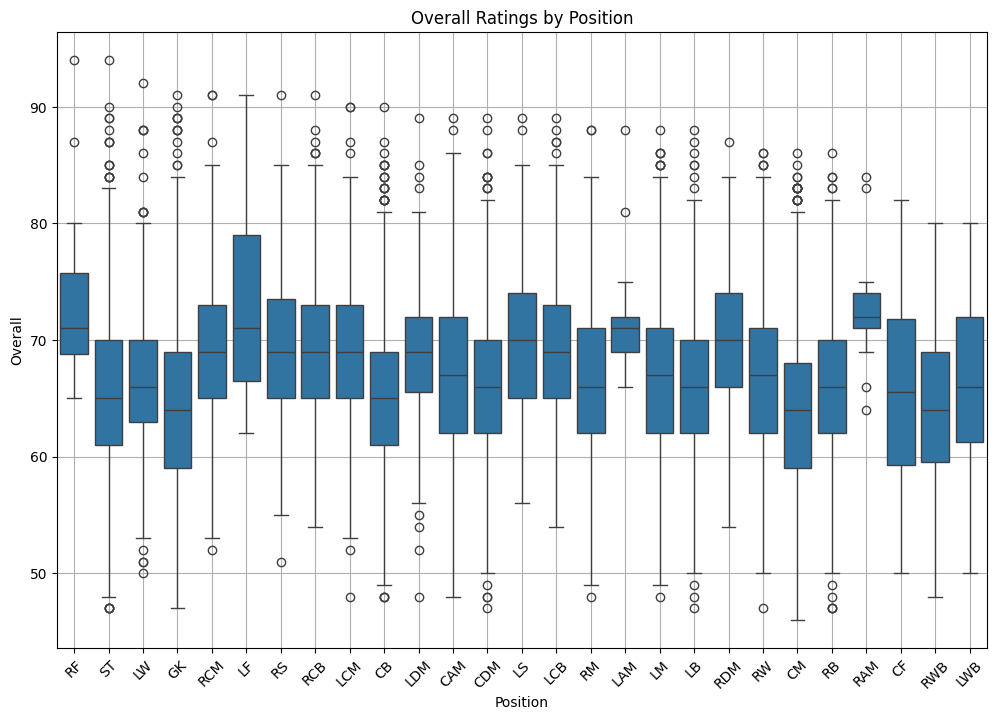

In [32]:
# Boxplot of Overall Ratings by Position
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position', y='Overall', data=sport_data)
plt.title('Overall Ratings by Position')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [33]:
# High Potential Players
high_potential_players = sport_data[sport_data['Potential'] > 85].sort_values(by='Value', ascending=True).head(20)
high_potential_players[['Name', 'Position', 'Overall', 'Potential', 'Value', 'Wage']]

,Name,Position,Overall,Potential,Value,Wage
13927,A. Dabo,LM,62,86,650000,2000
9935,C. Früchtl,GK,65,86,1000000,3000
11457,W. Geubbels,ST,64,86,1000000,5000
10801,E. Ampadu,LDM,65,86,1100000,8000
9485,S. Diop,CAM,66,87,1500000,8000
8191,A. Gomes,CAM,67,87,1500000,15000
7952,A. Bastoni,CB,67,87,1500000,7000
8700,M. Gibbs-White,CM,67,86,1600000,10000
8145,A. Gouiri,ST,67,86,1600000,10000
7758,P. Pellegri,ST,67,88,1700000,11000


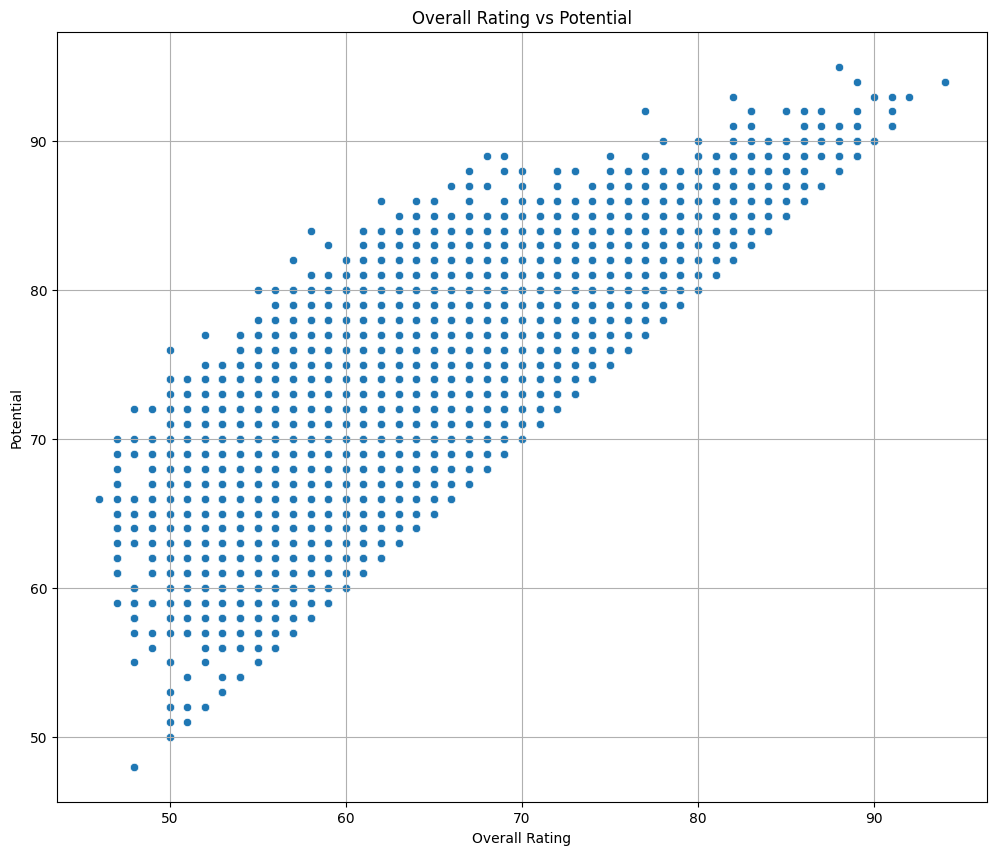

In [34]:
# Correlation between Overall and Potential
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Overall', y='Potential', data=sport_data)
plt.title('Overall Rating vs Potential')
plt.xlabel('Overall Rating')
plt.ylabel('Potential')
plt.grid()
plt.show()

In [35]:
# Calculate correlation matrix
correlation_matrix = sport_data[['Overall', 'Potential', 'Value', 'Wage']].corr()

# show
correlation_matrix

,Overall,Potential,Value,Wage
Overall,1.000000,0.660939,0.62795,0.572156
Potential,0.660939,1.000000,0.57624,0.486463
Value,0.627950,0.576240,1.00000,0.858110
Wage,0.572156,0.486463,0.85811,1.000000


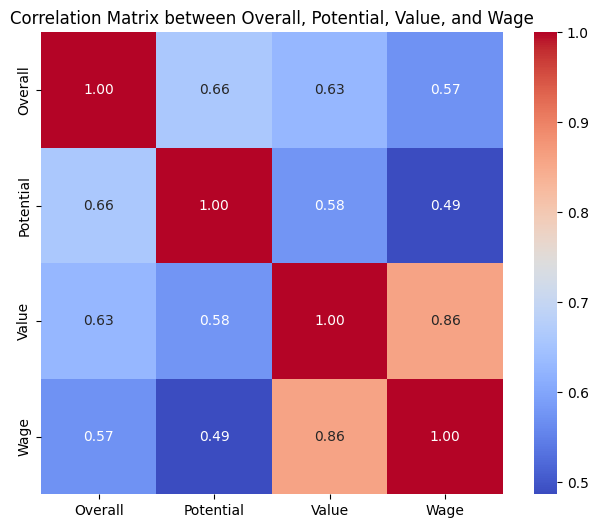

In [36]:
# plot
plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)

plt.title('Correlation Matrix between Overall, Potential, Value, and Wage')
plt.show()

In [37]:
# Count of players by position
position_counts = sport_data['Position'].value_counts()
position_counts

Position
ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64

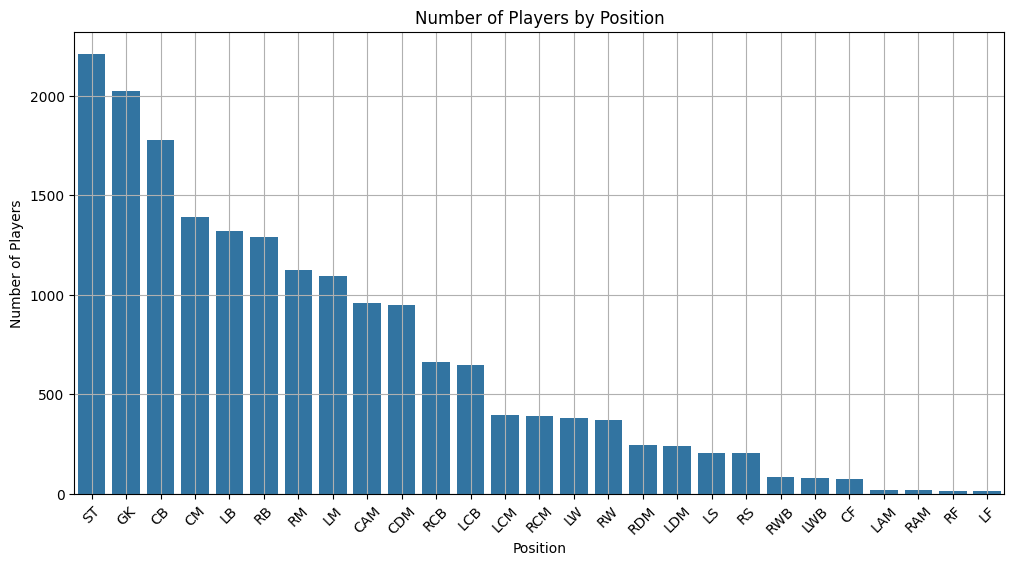

In [38]:
# plot
plt.figure(figsize=(12, 6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Number of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [39]:
# Count the current number of players per position for each team
position_per_team = sport_data.groupby(['Club', 'Position']).size().unstack(fill_value=0).reset_index()

# show data
position_per_team

Position,Club,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,SSV Jahn Regensburg,0,5,1,0,2,3,1,2,1,0,1,0,2,1,0,0,1,2,1,0,1,0,0,1,0,0,4
1,1. FC Heidenheim 1846,2,3,0,0,2,3,0,3,1,0,1,0,3,0,0,0,0,2,1,0,1,0,3,0,0,0,3
2,1. FC Kaiserslautern,0,3,3,0,0,3,0,2,1,0,1,0,2,1,1,0,0,2,1,0,1,0,2,1,0,0,2
3,1. FC Köln,1,4,1,0,5,4,0,1,1,1,0,0,0,1,0,1,0,1,1,0,0,0,2,1,0,1,2
4,1. FC Magdeburg,1,5,1,1,0,3,0,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,3,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Zagłębie Sosnowiec,3,2,2,0,0,3,0,3,1,0,1,0,4,0,0,0,0,1,1,0,1,0,2,0,0,0,1
647,Çaykur Rizespor,2,3,5,0,0,4,0,3,1,0,1,0,2,0,0,0,0,3,0,0,1,0,2,0,0,0,3
648,Örebro SK,1,4,0,0,1,3,0,0,1,1,0,0,0,0,3,2,0,0,1,1,0,0,0,0,2,2,5
649,Östersunds FK,1,1,0,1,3,3,0,2,1,1,0,0,2,0,1,0,0,1,1,1,0,0,1,0,1,0,1


In [40]:
# define weights for scoring players
weights = {
    'Overall' : 0.3,
    'Potential' : 0.5,
    'Performance Metric' : 0.2
}

performance_metrics = {
    'RF': ['Finishing', 'ShotPower', 'Dribbling', 'Acceleration', 'Positioning', 'BallControl', 'Crossing'],
    'ST': ['Finishing', 'ShotPower', 'Dribbling', 'Positioning', 'HeadingAccuracy', 'Strength', 'Balance'],
    'LW': ['Dribbling', 'Crossing', 'Finishing', 'Acceleration', 'BallControl', 'Vision'],
    'GK': ['GKDiving', 'GKReflexes', 'GKPositioning', 'GKHandling', 'GKKicking', 'Communication', 'OneOnOne'],
    'RCM': ['ShortPassing', 'LongPassing', 'Vision', 'BallControl', 'WorkRate', 'Tackling'],
    'LF': ['Finishing', 'Dribbling', 'Acceleration', 'Positioning', 'BallControl', 'Strength'],
    'RS': ['Finishing', 'ShotPower', 'Dribbling', 'Positioning', 'HeadingAccuracy', 'Strength'],
    'RCB': ['Interceptions', 'Marking', 'StandingTackle', 'HeadingAccuracy', 'Strength', 'Positioning'],
    'LCM': ['ShortPassing', 'LongPassing', 'Vision', 'BallControl', 'WorkRate', 'Tackling'],
    'CB': ['Interceptions', 'Marking', 'StandingTackle', 'HeadingAccuracy', 'Strength', 'Positioning'],
    'LDM': ['Interceptions', 'Marking', 'StandingTackle', 'ShortPassing', 'WorkRate', 'Tackling'],
    'CAM': ['ShortPassing', 'Vision', 'Dribbling', 'BallControl', 'Finishing', 'Creativity'],
    'CDM': ['Interceptions', 'Marking', 'ShortPassing', 'StandingTackle', 'WorkRate', 'Tackling'],
    'LS': ['Finishing', 'Dribbling', 'ShotPower', 'Positioning', 'Acceleration', 'BallControl'],
    'LCB': ['Interceptions', 'Marking', 'StandingTackle', 'HeadingAccuracy', 'Strength', 'Positioning'],
    'RM': ['Crossing', 'Dribbling', 'ShortPassing', 'Acceleration', 'BallControl', 'Vision'],
    'LAM': ['Dribbling', 'Crossing', 'Finishing', 'Acceleration', 'BallControl', 'Creativity'],
    'LM': ['Dribbling', 'Crossing', 'ShortPassing', 'Acceleration', 'BallControl', 'WorkRate'],
    'LB': ['Interceptions', 'Marking', 'Crossing', 'Acceleration', 'Tackling', 'Positioning'],
    'RDM': ['Interceptions', 'Marking', 'ShortPassing', 'WorkRate', 'Tackling', 'Positioning'],
    'RW': ['Crossing', 'Dribbling', 'Finishing', 'Acceleration', 'BallControl', 'Vision'],
    'CM': ['ShortPassing', 'LongPassing', 'Vision', 'BallControl', 'WorkRate', 'Tackling'],
    'RB': ['Interceptions', 'Marking', 'Crossing', 'Acceleration', 'Tackling', 'Positioning'],
    'RAM': ['Dribbling', 'Crossing', 'Finishing', 'Acceleration', 'BallControl', 'Creativity'],
    'CF': ['Finishing', 'Dribbling', 'Positioning', 'Strength', 'HeadingAccuracy', 'BallControl'],
    'RWB': ['Interceptions', 'Crossing', 'Dribbling', 'Acceleration', 'Positioning', 'Tackling'],
    'LWB': ['Interceptions', 'Crossing', 'Dribbling', 'Acceleration', 'Positioning', 'Tackling']
}

# Define a function to calculate scores based on position
def calculate_player_score(row):
    position = row['Position']
    
    # Calculate performance metric based on position
    if position in performance_metrics:
        performance_metric = sum(row[metric] for metric in performance_metrics[position] if metric in row)
    else:
        performance_metric = 0  # Default score for unknown positions
    
    # Calculate the final score using the defined weights
    score = (weights['Overall'] * row['Overall'] +
             weights['Potential'] * row['Potential'] +
             weights['Performance Metric'] * performance_metric)
    return score


In [41]:
# cal scores for each players
# add column score to data
sport_data['Score'] = sport_data.apply(calculate_player_score, axis=1)

In [42]:
# check columns
sport_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Score
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,203.6
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,197.2
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,181.7
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,162.6
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,146.9


In [43]:
# sorted players in data by highest score
sorted_players = sport_data.sort_values(by='Score', ascending=False) 

# show data
sorted_players.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Score
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,203.6
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,197.2
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000,205000,Right,4.0,4.0,4.0,High/ Medium,Normal,ST,9.0,"Jul 1, 2014",2021,6'0,176lbs,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M,192.4
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000,300000,Right,4.0,4.0,4.0,High/ Medium,Stocky,ST,10.0,"Jul 28, 2011",2021,5'8,154lbs,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M,191.8
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000,205000,Right,3.0,4.0,3.0,High/ High,Normal,ST,9.0,"Jul 1, 2010",2024,6'2,196lbs,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,84.0,68.0,72.0,71.0,91.0,71.0,88.0,78.0,89.0,84.0,85.0,76.0,35.0,93.0,80.0,90.0,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M,191.2


In [44]:
# player selection
# set budget and wage budget
budget = 150000000
wage_budget = 2000000

# Define the ideal squad composition per position max 22 players
ideal_composition = {
    'ST': 2,
    'LW': 2,
    'CM': 3,
    'GK': 2,
    'CB': 3,
    'LB': 2,
    'RB': 2,
    'RM': 2,
    'CF': 1,
    'LAM': 1,
    'RAM': 1,
    'CDM': 1
}

In [45]:
# Initialize counters and selected players list
selected_players = []  # Make empty list for selected players
budget_cost = 0  # Counter for budget
wage_cost = 0  # Counter for wage budget
position_count = {key: 0 for key in ideal_composition}  # Initialize position counters

# Filter based on budget, wage budget, and ideal composition
for index, player in sorted_players.iterrows():
    position = player['Position']
    # Check if the position exists in the ideal composition
    if position not in ideal_composition:
        continue  # Skip players with positions not in ideal_composition
    
    if (budget_cost + player['Value'] <= budget and
            wage_cost + player['Wage'] <= wage_budget and
            position_count[position] < ideal_composition[position]):
        selected_players.append(player)  # Add player to selected list
        budget_cost += player['Value']  # Update budget cost
        wage_cost += player['Wage']  # Update wage cost
        position_count[position] += 1  # Increment the count for the position

In [46]:
# convert selected players to dataframe
selected_players = pd.DataFrame(selected_players)

# show data
selected_players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Score
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,197.2
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000,300000,Right,4.0,4.0,4.0,High/ Medium,Stocky,ST,10.0,"Jul 28, 2011",2021,5'8,154lbs,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M,191.8
152,137186,A. Barzagli,37,Italy,84,84,Juventus,4200000,95000,Right,3.0,3.0,2.0,Low/ High,Normal,CB,15.0,"Jan 1, 2011",2019,6'2,192lbs,40.0,21.0,72.0,65.0,35.0,64.0,50.0,31.0,65.0,65.0,61.0,77.0,52.0,80.0,64.0,54.0,81.0,53.0,83.0,39.0,66.0,90.0,28.0,62.0,60.0,88.0,94.0,90.0,82.0,4.0,2.0,4.0,2.0,4.0,€6.9M,158.6
41,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000000,77000,Right,4.0,2.0,1.0,Medium/ Medium,Normal,GK,1.0,"Jul 6, 2018",2019,6'4,203lbs,13.0,15.0,13.0,37.0,17.0,26.0,20.0,13.0,35.0,28.0,49.0,43.0,55.0,79.0,49.0,39.0,75.0,39.0,69.0,13.0,38.0,28.0,12.0,50.0,22.0,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M,154.8
3128,7647,D. Dainelli,39,Italy,73,73,Livorno,270000,2000,Right,2.0,3.0,2.0,Low/ Medium,Lean,CB,3.0,"Jul 16, 2018",2019,6'3,172lbs,28.0,22.0,73.0,56.0,19.0,52.0,40.0,31.0,64.0,55.0,30.0,33.0,30.0,70.0,34.0,69.0,74.0,32.0,79.0,31.0,69.0,83.0,16.0,25.0,30.0,75.0,73.0,76.0,70.0,6.0,12.0,14.0,13.0,10.0,€419K,138.4
11125,155422,J. Szmatuła,37,Poland,64,64,Piast Gliwice,30000,1000,Right,1.0,3.0,1.0,Medium/ Medium,Normal,GK,1.0,"Jul 1, 2008",2019,6'2,179lbs,9.0,14.0,14.0,21.0,12.0,13.0,11.0,11.0,13.0,17.0,30.0,33.0,39.0,53.0,38.0,24.0,50.0,21.0,64.0,9.0,38.0,22.0,16.0,47.0,14.0,67.0,16.0,15.0,12.0,63.0,64.0,66.0,66.0,65.0,€41K,116.0


<Axes: xlabel='Overall', ylabel='Count'>

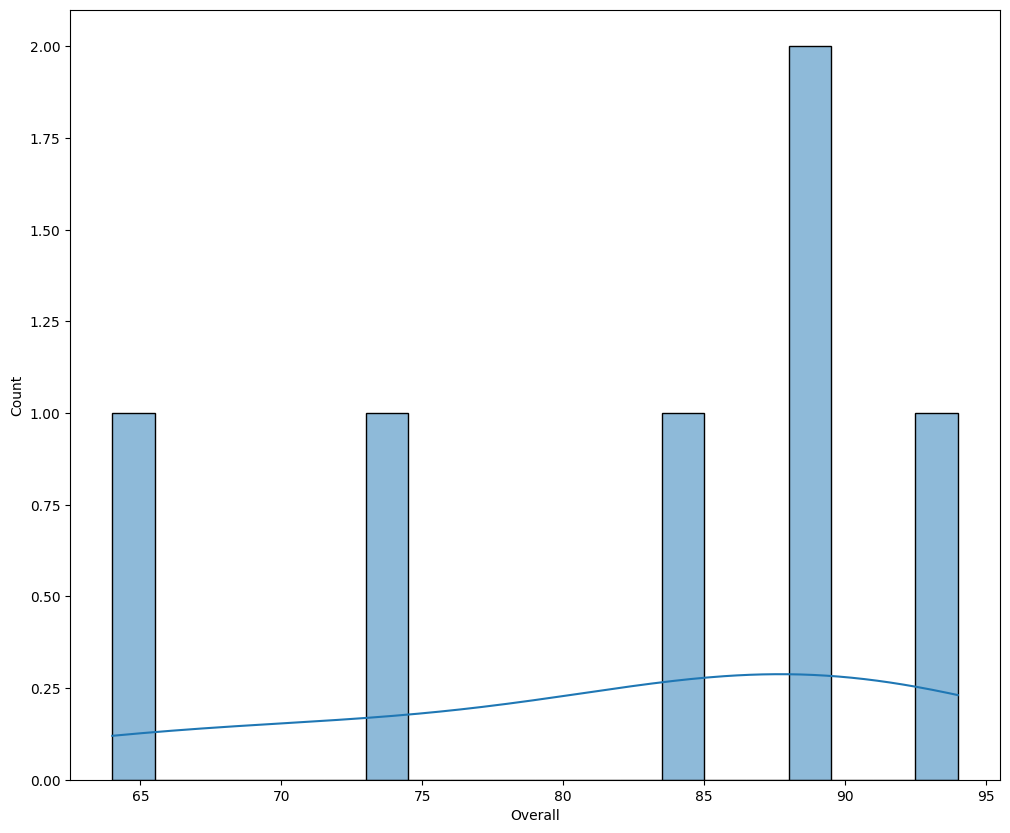

In [47]:
# distribution of Overall in selected players
plt.figure(figsize=(12, 10))

sns.histplot(selected_players['Overall'], bins=20, kde=True)

In [48]:
# average Overall in selected players
selected_players['Overall'].median()

86.0

In [49]:
# average Overall by position in selected players
average_overall_selected_position = selected_players.groupby('Position')['Overall'].median().reset_index()

# show data
average_overall_selected_position

,Position,Overall
0,CB,78.5
1,GK,76.0
2,ST,91.5


C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3783881115.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_overall_selected_position, x='Position', y='Overall', palette='viridis', ci=None)
C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3783881115.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_overall_selected_position, x='Position', y='Overall', palette='viridis', ci=None)


Text(0, 0.5, 'Average Overall')

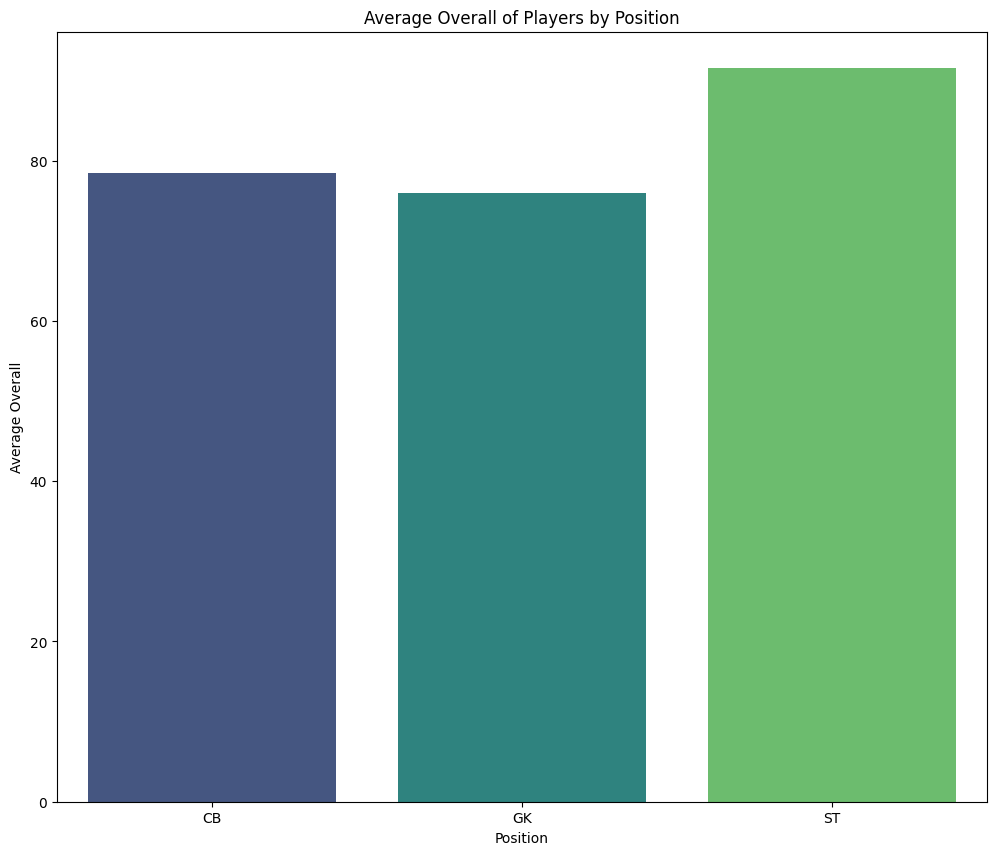

In [75]:
# plot
plt.figure(figsize=(12, 10))

sns.barplot(data=average_overall_selected_position, x='Position', y='Overall', palette='viridis', ci=None)

plt.title('Average Overall of Players by Position')
plt.xlabel('Position')
plt.ylabel('Average Overall')

In [51]:
# position distributinon on selected players
position_distribution_selected = selected_players['Position'].value_counts()

# show data
position_distribution_selected

Position
ST    2
CB    2
GK    2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

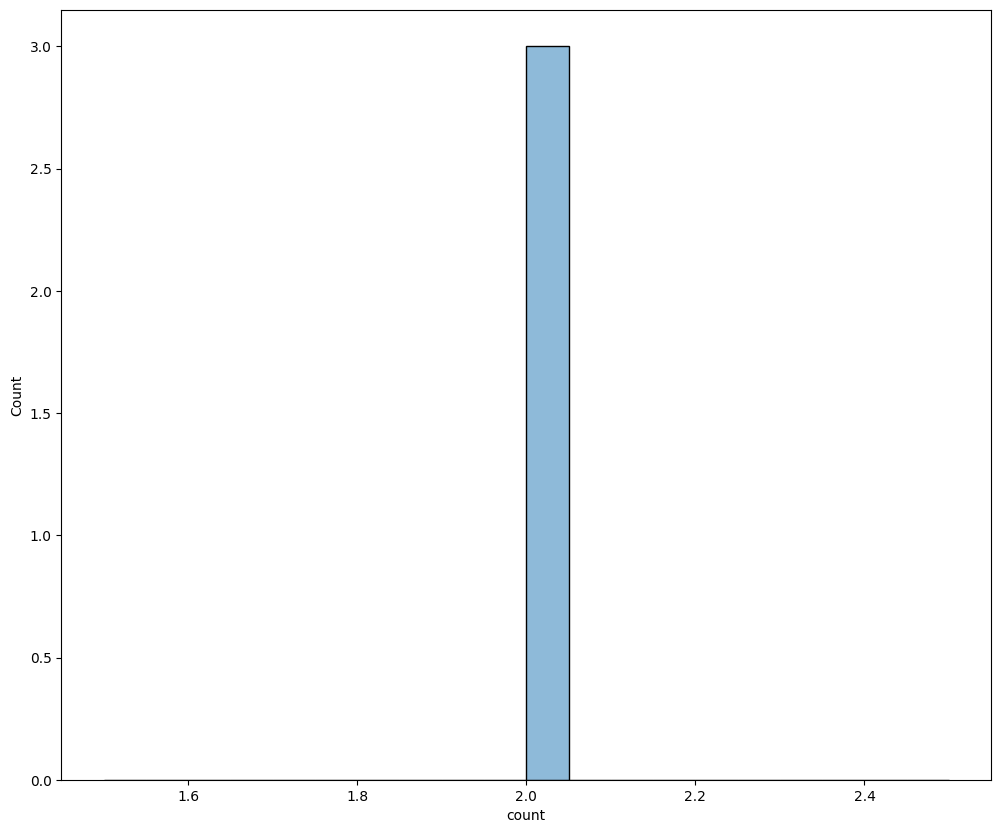

In [52]:
# plot
plt.figure(figsize=(12, 10))

sns.histplot(data=position_distribution_selected, bins=20, kde=True)

<Axes: xlabel='Potential', ylabel='Count'>

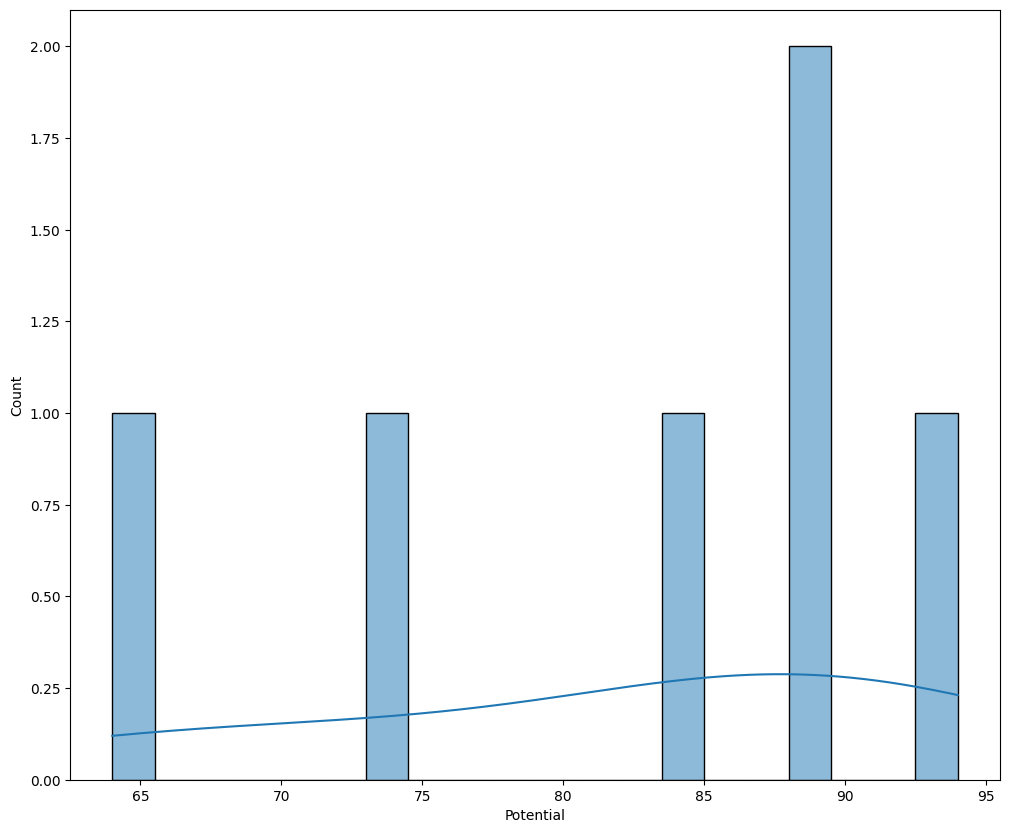

In [53]:
# distribution of Potential in selected players
plt.figure(figsize=(12, 10))

sns.histplot(selected_players['Potential'], bins=20, kde=True)

In [54]:
# average potential by position in selected players
average_potential_selected_position = selected_players.groupby('Position')['Potential'].median().reset_index()

# show data
average_potential_selected_position

,Position,Potential
0,CB,78.5
1,GK,76.0
2,ST,91.5


C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3126083565.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_potential_selected_position, x='Position', y='Potential', palette='viridis', ci=None)
C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3126083565.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_potential_selected_position, x='Position', y='Potential', palette='viridis', ci=None)


Text(0, 0.5, 'Average Potential')

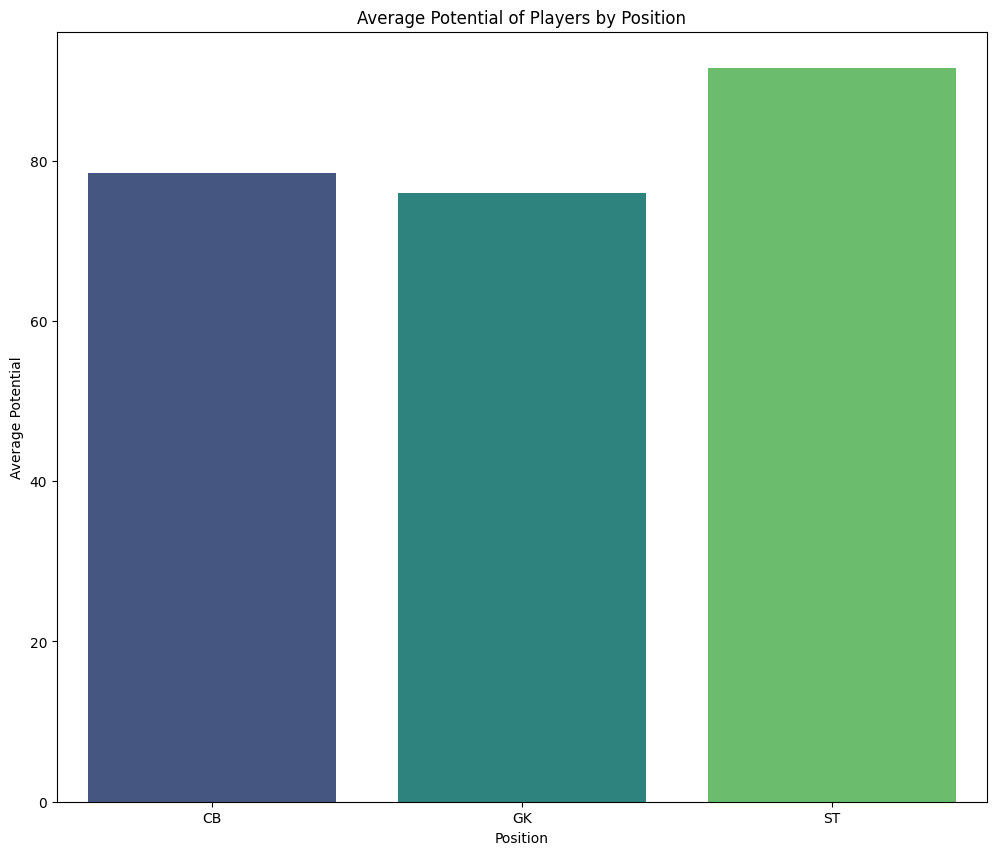

In [55]:
# plot
plt.figure(figsize=(12, 10))

sns.barplot(data=average_potential_selected_position, x='Position', y='Potential', palette='viridis', ci=None)

plt.title('Average Potential of Players by Position')
plt.xlabel('Position')
plt.ylabel('Average Potential')

In [56]:
# top player recomendation
top_recommendations = selected_players[['Name', 'Age', 'Club', 'Position', 'Overall', 'Potential', 'Value', 'Wage']]

# show
top_recommendations

,Name,Age,Club,Position,Overall,Potential,Value,Wage
1,Cristiano Ronaldo,33,Juventus,ST,94,94,77000000,405000
23,S. Agüero,30,Manchester City,ST,89,89,64500000,300000
152,A. Barzagli,37,Juventus,CB,84,84,4200000,95000
41,G. Buffon,40,Paris Saint-Germain,GK,88,88,4000000,77000
3128,D. Dainelli,39,Livorno,CB,73,73,270000,2000
11125,J. Szmatuła,37,Piast Gliwice,GK,64,64,30000,1000


In [57]:
# remaining budget
remaining_budget = budget - budget_cost
remaining_wage_budget = wage_budget - wage_cost

# print
print(f'Remaining Budget: {remaining_budget}')
print(f'Remaining Wage Budget: {remaining_wage_budget}')

Remaining Budget: 0
Remaining Wage Budget: 1120000


In [58]:
# position needs to add to team
# Calculate position needs
position_needs = pd.Series(ideal_composition) - pd.Series(position_count)

# Count current players in the selected team
current_player_count = selected_players.shape[0]

# Calculate how many more players are needed to reach 22
players_needed = 22 - current_player_count

# If players_needed is less than or equal to 0, you already have enough players
if players_needed <= 0:
    print("You already have enough players in your team.")
else:
    # Get the top positions that need players
    position_needs = position_needs[position_needs > 0]  # Only consider positions that need players
    position_needs = position_needs.nlargest(players_needed)  # Get the top positions needed

    # Print the results
    print(f'Position Need to be Added to Team (Total Needed: {players_needed}):')
    print(position_needs)

Position Need to be Added to Team (Total Needed: 16):
CM     3
LW     2
LB     2
RB     2
RM     2
CB     1
CF     1
LAM    1
RAM    1
CDM    1
dtype: int64


In [59]:
# define new weights for scoring players
weights = {
    'Overall' : 0.2,
    'Potential' : 0.6,
    'Performance Metric' : 0.2
}

performance_metrics = {
    'RF': ['Finishing', 'ShotPower', 'Dribbling', 'Acceleration', 'Positioning', 'BallControl', 'Crossing'],
    'ST': ['Finishing', 'ShotPower', 'Dribbling', 'Positioning', 'HeadingAccuracy', 'Strength', 'Balance'],
    'LW': ['Dribbling', 'Crossing', 'Finishing', 'Acceleration', 'BallControl', 'Vision'],
    'GK': ['GKDiving', 'GKReflexes', 'GKPositioning', 'GKHandling', 'GKKicking', 'Communication', 'OneOnOne'],
    'RCM': ['ShortPassing', 'LongPassing', 'Vision', 'BallControl', 'WorkRate', 'Tackling'],
    'LF': ['Finishing', 'Dribbling', 'Acceleration', 'Positioning', 'BallControl', 'Strength'],
    'RS': ['Finishing', 'ShotPower', 'Dribbling', 'Positioning', 'HeadingAccuracy', 'Strength'],
    'RCB': ['Interceptions', 'Marking', 'StandingTackle', 'HeadingAccuracy', 'Strength', 'Positioning'],
    'LCM': ['ShortPassing', 'LongPassing', 'Vision', 'BallControl', 'WorkRate', 'Tackling'],
    'CB': ['Interceptions', 'Marking', 'StandingTackle', 'HeadingAccuracy', 'Strength', 'Positioning'],
    'LDM': ['Interceptions', 'Marking', 'StandingTackle', 'ShortPassing', 'WorkRate', 'Tackling'],
    'CAM': ['ShortPassing', 'Vision', 'Dribbling', 'BallControl', 'Finishing', 'Creativity'],
    'CDM': ['Interceptions', 'Marking', 'ShortPassing', 'StandingTackle', 'WorkRate', 'Tackling'],
    'LS': ['Finishing', 'Dribbling', 'ShotPower', 'Positioning', 'Acceleration', 'BallControl'],
    'LCB': ['Interceptions', 'Marking', 'StandingTackle', 'HeadingAccuracy', 'Strength', 'Positioning'],
    'RM': ['Crossing', 'Dribbling', 'ShortPassing', 'Acceleration', 'BallControl', 'Vision'],
    'LAM': ['Dribbling', 'Crossing', 'Finishing', 'Acceleration', 'BallControl', 'Creativity'],
    'LM': ['Dribbling', 'Crossing', 'ShortPassing', 'Acceleration', 'BallControl', 'WorkRate'],
    'LB': ['Interceptions', 'Marking', 'Crossing', 'Acceleration', 'Tackling', 'Positioning'],
    'RDM': ['Interceptions', 'Marking', 'ShortPassing', 'WorkRate', 'Tackling', 'Positioning'],
    'RW': ['Crossing', 'Dribbling', 'Finishing', 'Acceleration', 'BallControl', 'Vision'],
    'CM': ['ShortPassing', 'LongPassing', 'Vision', 'BallControl', 'WorkRate', 'Tackling'],
    'RB': ['Interceptions', 'Marking', 'Crossing', 'Acceleration', 'Tackling', 'Positioning'],
    'RAM': ['Dribbling', 'Crossing', 'Finishing', 'Acceleration', 'BallControl', 'Creativity'],
    'CF': ['Finishing', 'Dribbling', 'Positioning', 'Strength', 'HeadingAccuracy', 'BallControl'],
    'RWB': ['Interceptions', 'Crossing', 'Dribbling', 'Acceleration', 'Positioning', 'Tackling'],
    'LWB': ['Interceptions', 'Crossing', 'Dribbling', 'Acceleration', 'Positioning', 'Tackling']
}

# Define a function to calculate scores based on position
def calculate_player_score(row):
    position = row['Position']
    
    # Calculate performance metric based on position
    if position in performance_metrics:
        performance_metric = sum(row[metric] for metric in performance_metrics[position] if metric in row)
    else:
        performance_metric = 0  # Default score for unknown positions
    
    # Calculate the final score using the defined weights
    score = (weights['Overall'] * row['Overall'] +
             weights['Potential'] * row['Potential'] +
             weights['Performance Metric'] * performance_metric)
    return score


In [60]:
# cal new scores for each players
# drop existing score column
sport_data.drop(columns='Score')

# add column score to data
sport_data['Score'] = sport_data.apply(calculate_player_score, axis=1)

In [61]:
# show data
sport_data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Score
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,203.6
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,197.2
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,181.8
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,162.8
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000,1000,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,86.2
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000,1000,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,117.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000,1000,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,"Jul 1, 2017",2021,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K,112.4
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000,1000,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,34.0,"Apr 24, 2018",2019,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K,110.0


In [62]:
# Define maximum allowable values
max_value = 10000000  # Maximum value a player can have
max_wage = 120000  # Maximum wage a player can have

# Initialize counters and selected players list
new_selected_players = []  # Make empty list for selected players
new_budget_cost = 0  # Counter for budget
new_wage_cost = 0  # Counter for wage budget
new_position_count = {key: 0 for key in ideal_composition}  # Initialize position counters

# First pass: Fill positions based on ideal composition
for position, required_count in ideal_composition.items():
    # Filter players for the current position
    position_players = sorted_players[
        (sorted_players['Position'] == position) &
        (sorted_players['Value'] <= max_value) &
        (sorted_players['Wage'] <= max_wage)
    ]
    
    for index, player in position_players.iterrows():
        # Check if adding this player would exceed budget and wage limits
        if (new_budget_cost + player['Value'] <= budget and
                new_wage_cost + player['Wage'] <= wage_budget and
                new_position_count[position] < required_count):
            
            new_selected_players.append(player)  # Add player to selected list
            new_budget_cost += player['Value']  # Update budget cost
            new_wage_cost += player['Wage']  # Update wage cost
            new_position_count[position] += 1  # Increment the count for the position
            
            # Break if we have filled the required count for this position
            if new_position_count[position] >= required_count:
                break

# Convert selected players list to DataFrame for better readability
selected_players_df = pd.DataFrame(new_selected_players)

# show data
selected_players_df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Score
316,106231,Aduriz,37,Spain,82,82,Athletic Club de Bilbao,8000000,29000,Right,3.0,3.0,3.0,High/ Medium,Normal,ST,20.0,"Jul 1, 2012",2019,6'0,172lbs,54.0,83.0,92.0,72.0,80.0,76.0,61.0,54.0,52.0,82.0,64.0,66.0,50.0,85.0,55.0,82.0,90.0,60.0,82.0,78.0,82.0,23.0,87.0,73.0,82.0,87.0,58.0,44.0,49.0,14.0,10.0,9.0,15.0,9.0,€16.8M,177.0
315,113422,David Villa,36,Spain,82,82,New York City FC,8000000,12000,Right,3.0,5.0,4.0,High/ Low,Normal,ST,7.0,"Jul 1, 2014",2018,5'9,152lbs,71.0,86.0,67.0,76.0,79.0,83.0,83.0,80.0,67.0,85.0,72.0,67.0,71.0,83.0,73.0,81.0,67.0,70.0,66.0,79.0,67.0,29.0,86.0,75.0,88.0,83.0,30.0,28.0,38.0,8.0,9.0,9.0,11.0,9.0,€12M,174.0
524,176376,I. Piatti,33,Argentina,80,80,Montreal Impact,9000000,13000,Right,2.0,4.0,5.0,High/ Medium,Lean,LW,10.0,"Aug 15, 2014",2020,5'11,168lbs,69.0,81.0,54.0,78.0,77.0,86.0,80.0,55.0,74.0,84.0,77.0,76.0,87.0,82.0,81.0,83.0,31.0,89.0,73.0,80.0,79.0,55.0,83.0,77.0,80.0,82.0,61.0,62.0,24.0,14.0,13.0,7.0,7.0,15.0,€13.5M,158.8
2521,228819,M. Vargas,21,Argentina,74,85,Vélez Sarsfield,9500000,12000,Right,1.0,3.0,4.0,High/ Medium,Normal,LW,26.0,"May 1, 2015",2020,5'6,146lbs,72.0,70.0,39.0,71.0,59.0,78.0,56.0,53.0,69.0,78.0,90.0,80.0,85.0,63.0,87.0,70.0,67.0,86.0,48.0,64.0,42.0,28.0,67.0,73.0,69.0,74.0,43.0,40.0,35.0,10.0,13.0,14.0,10.0,7.0,€16.2M,156.9
452,207439,L. Paredes,24,Argentina,80,85,AS Monaco,1100000,1000,Right,2.0,4.0,4.0,Medium/ Medium,Normal,CM,5.0,"Jul 1, 2018",2019,5'11,165lbs,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,€1.1M,132.5
725,80,E. Belözoğlu,37,Turkey,79,79,Medipol Başakşehir FK,4000000,23000,Left,2.0,4.0,4.0,Medium/ Medium,Stocky,CM,5.0,"Jul 9, 2015",2019,5'7,159lbs,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,82.0,54.0,38.0,68.0,73.0,81.0,77.0,72.0,61.0,65.0,76.0,87.0,66.0,63.0,86.0,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0,€7.6M,131.4
513,184120,Bruno,34,Spain,80,80,Villarreal CF,7000000,39000,Left,3.0,3.0,3.0,Medium/ High,Normal,CM,21.0,"Jul 1, 2005",2020,6'0,161lbs,60.0,66.0,61.0,85.0,48.0,74.0,72.0,77.0,84.0,78.0,34.0,31.0,49.0,77.0,60.0,80.0,58.0,50.0,72.0,76.0,76.0,80.0,69.0,85.0,75.0,84.0,81.0,80.0,78.0,13.0,10.0,9.0,11.0,8.0,€14.7M,130.4
41,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000000,77000,Right,4.0,2.0,1.0,Medium/ Medium,Normal,GK,1.0,"Jul 6, 2018",2019,6'4,203lbs,13.0,15.0,13.0,37.0,17.0,26.0,20.0,13.0,35.0,28.0,49.0,43.0,55.0,79.0,49.0,39.0,75.0,39.0,69.0,13.0,38.0,28.0,12.0,50.0,22.0,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M,154.8
224,24630,Pepe Reina,35,Spain,83,83,Milan,6000000,56000,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,25.0,"Jul 2, 2018",2021,6'2,203lbs,11.0,14.0,13.0,19.0,11.0,10.0,11.0,11.0,22.0,23.0,50.0,63.0,50.0,82.0,60.0,24.0,73.0,34.0,72.0,15.0,32.0,22.0,13.0,65.0,24.0,64.0,20.0,22.0,24.0,80.0,83.0,82.0,82.0,82.0,€10.2M,148.2
102,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9000000,38000,Right,3.0,4.0,2.0,Medium/ Medium,Lean,CB,29.0,"Jul 1, 2016",2020,6'6,201lbs,45.0,57.0,94.0,76.0,60.0,60.0,52.0,76.0,70.0,68.0,60.0,65.0,46.0,85.0,36.0,92.0,45.0,61.0,83.0,82.0,72.0,83.0,53.0,59.0,60.0,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,€15.3M,165.4


In [63]:
# position distributinon on selected players
position_distribution_selected = selected_players_df['Position'].value_counts()

# show data
position_distribution_selected

Position
CM     3
CB     3
ST     2
LW     2
GK     2
LB     2
RB     2
RM     2
CF     1
LAM    1
RAM    1
CDM    1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

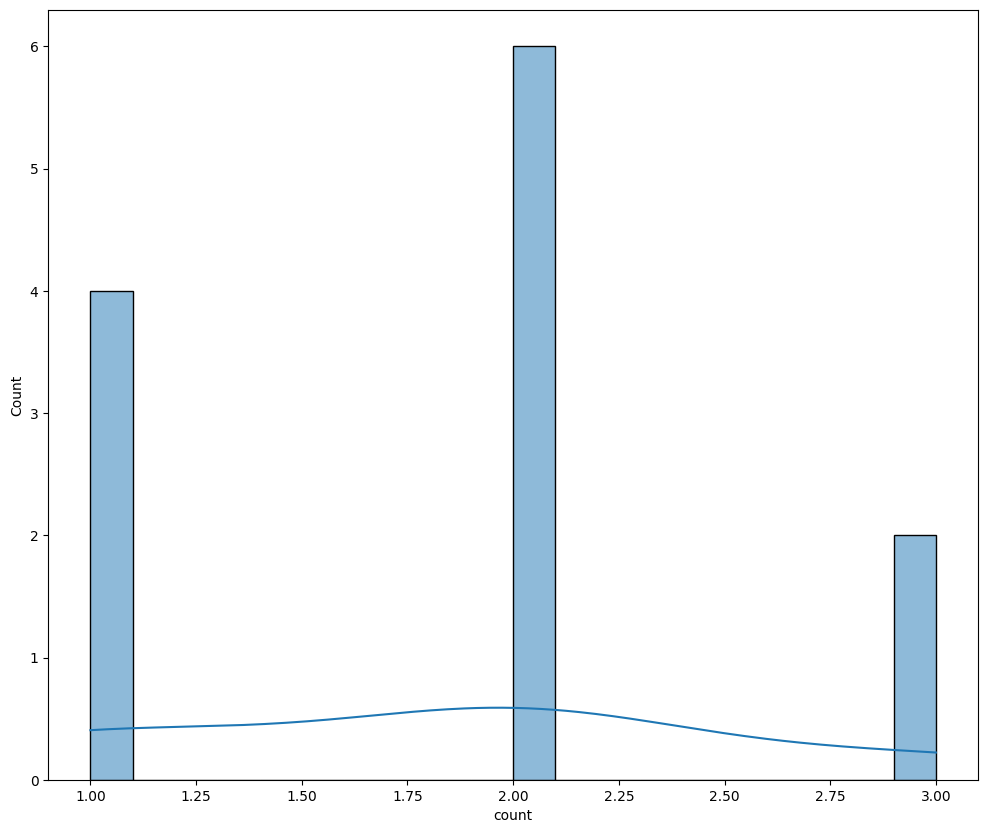

In [64]:
# plot
plt.figure(figsize=(12, 10))

sns.histplot(data=position_distribution_selected, bins=20, kde=True)

<Axes: xlabel='Overall', ylabel='Count'>

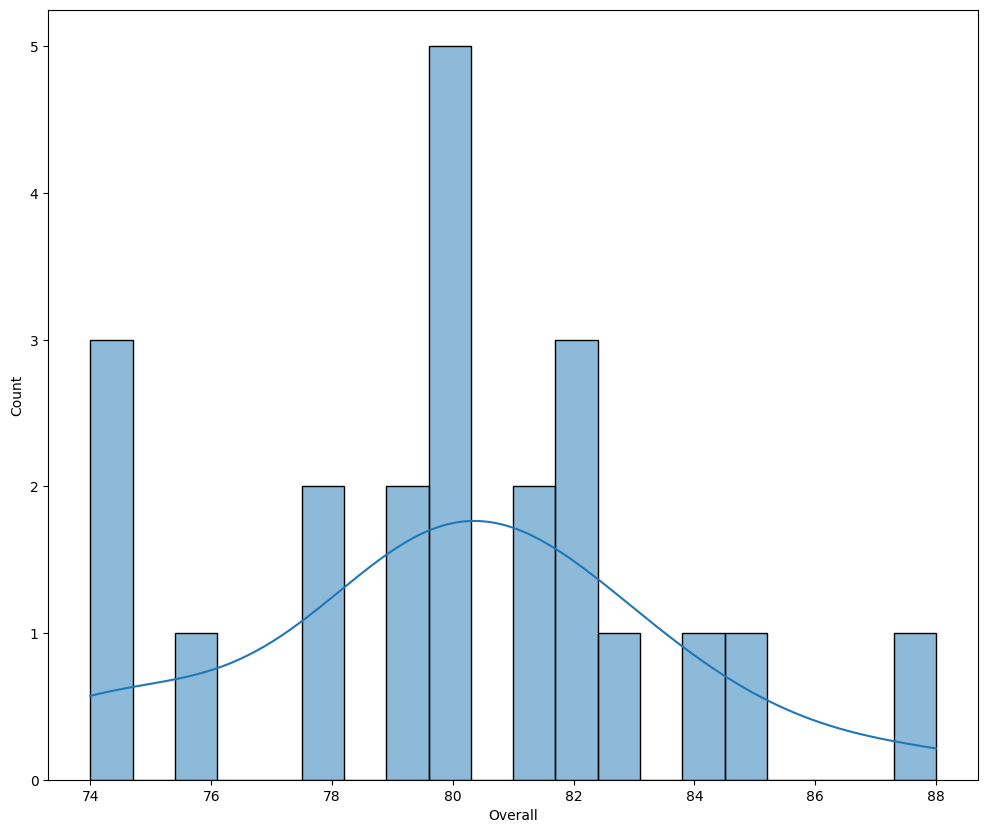

In [65]:
# overal distribution selected players
plt.figure(figsize=(12, 10))

sns.histplot(data=selected_players_df['Overall'], bins=20, kde=True)

In [66]:
# average overall selected players
selected_players_df['Overall'].mean()

80.0

In [79]:
# average overal by position in selected players
average_overal_selected_position = selected_players_df.groupby('Position')['Overall'].mean().reset_index()

# show data
average_overal_selected_position

,Position,Overall
0,CB,83.000000
1,CDM,80.000000
2,CF,76.000000
3,CM,79.666667
4,GK,85.500000
5,LAM,74.000000
6,LB,78.500000
7,LW,77.000000
8,RAM,74.000000
9,RB,81.500000


C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3383425306.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_overal_selected_position, x='Position', y='Overall', palette='viridis', ci=None)
C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3383425306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_overal_selected_position, x='Position', y='Overall', palette='viridis', ci=None)


Text(0, 0.5, 'Average Overall')

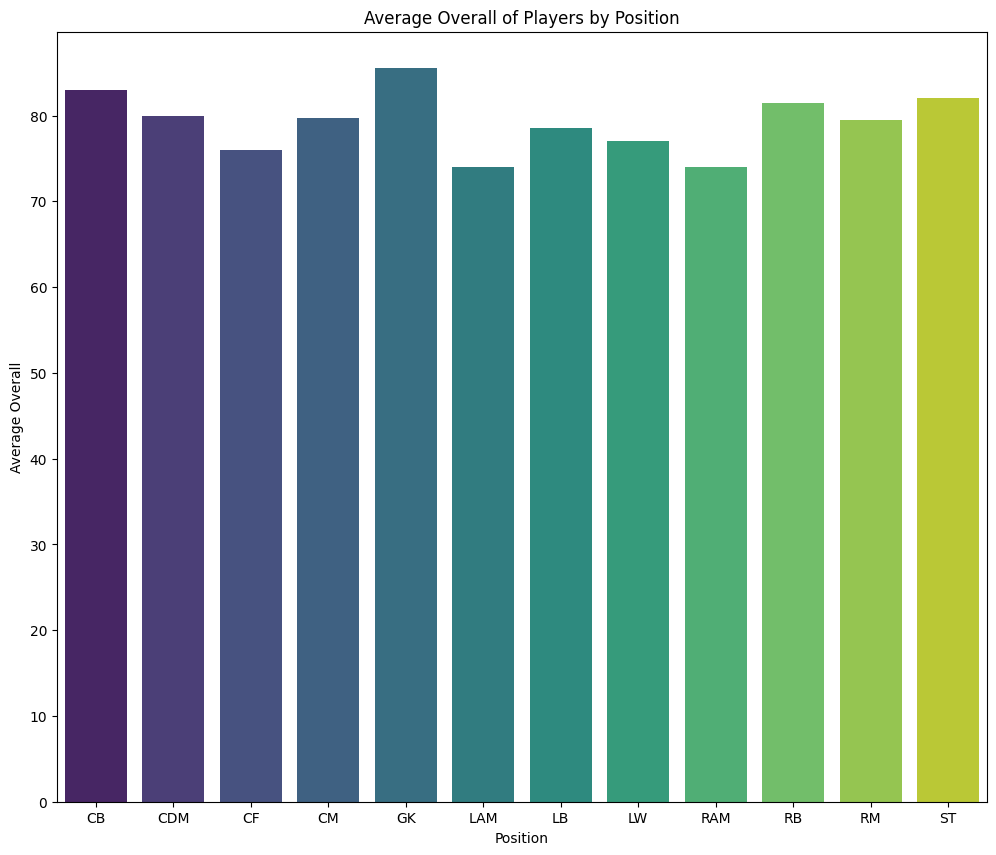

In [68]:
# plot
plt.figure(figsize=(12, 10))

sns.barplot(data=average_overal_selected_position, x='Position', y='Overall', palette='viridis', ci=None)

plt.title('Average Overall of Players by Position')
plt.xlabel('Position')
plt.ylabel('Average Overall')

<Axes: xlabel='Potential', ylabel='Count'>

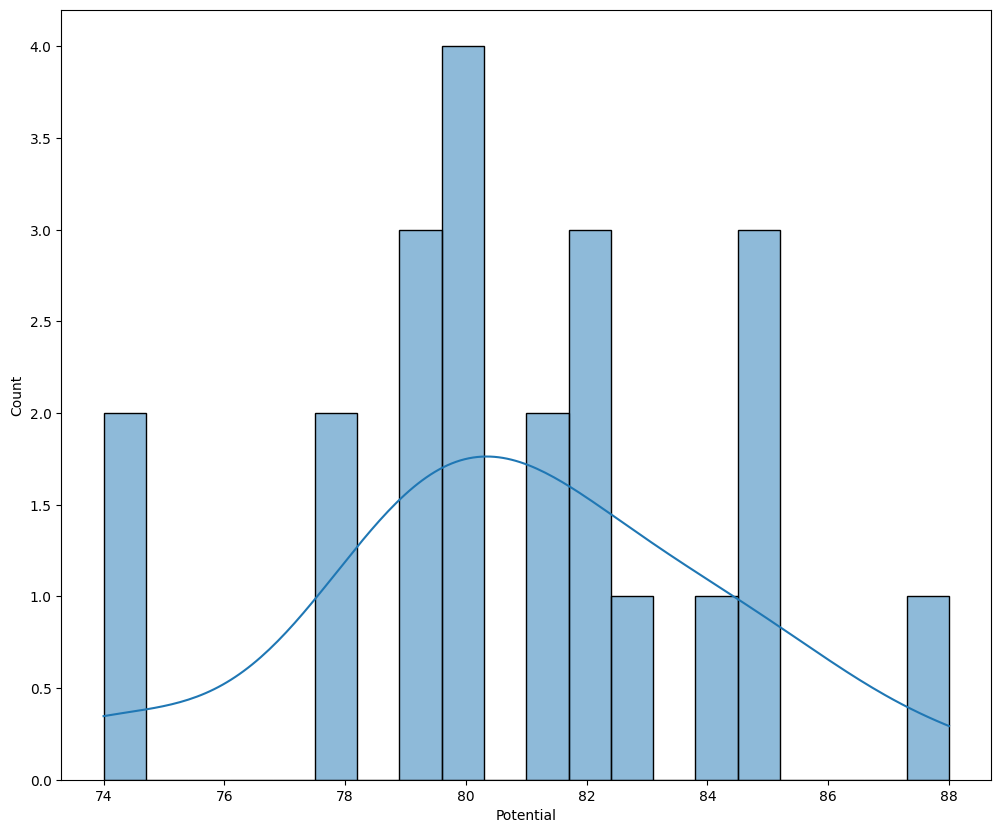

In [69]:
# potential distribution selected players
plt.figure(figsize=(12, 10))

sns.histplot(data=selected_players_df['Potential'], bins=20, kde=True)

In [70]:
# average potential by position in selected players
average_potential_selected_position = selected_players_df.groupby('Position')['Potential'].mean().reset_index()

# show data
average_potential_selected_position

,Position,Potential
0,CB,83.000000
1,CDM,80.000000
2,CF,79.000000
3,CM,81.333333
4,GK,85.500000
5,LAM,74.000000
6,LB,78.500000
7,LW,82.500000
8,RAM,74.000000
9,RB,81.500000


C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3126083565.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_potential_selected_position, x='Position', y='Potential', palette='viridis', ci=None)
C:\Users\MyBook Hype\AppData\Local\Temp\ipykernel_22916\3126083565.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_potential_selected_position, x='Position', y='Potential', palette='viridis', ci=None)


Text(0, 0.5, 'Average Potential')

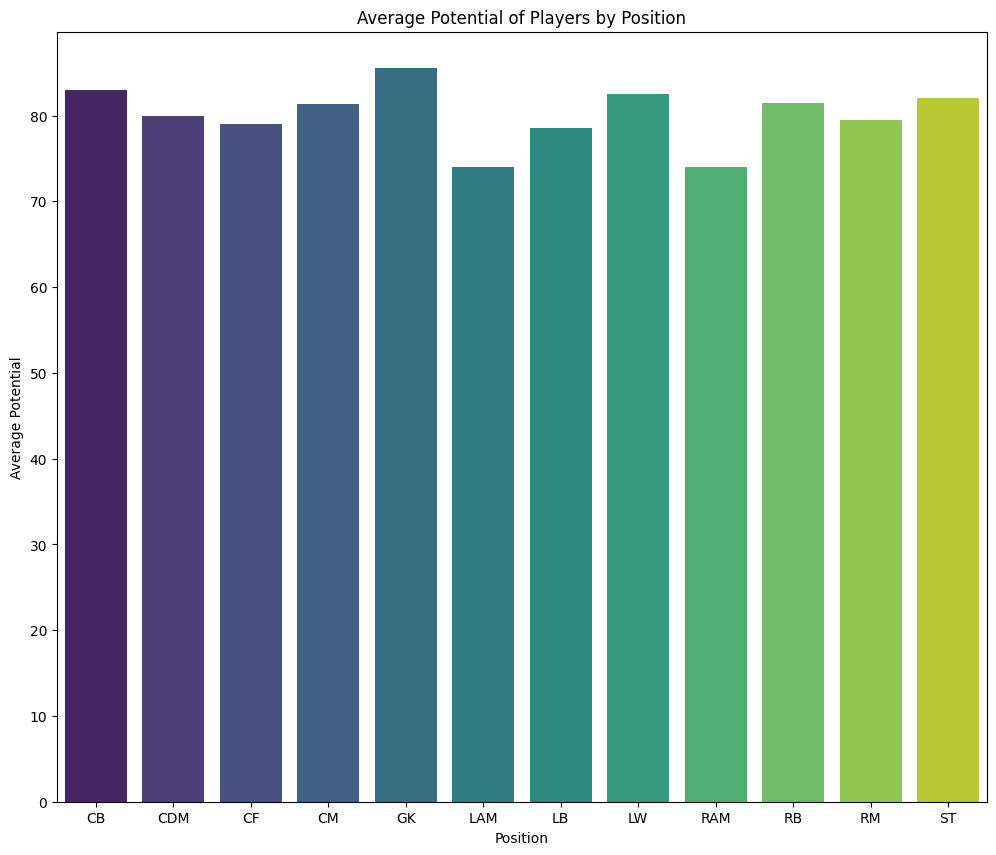

In [71]:
# plot
plt.figure(figsize=(12, 10))

sns.barplot(data=average_potential_selected_position, x='Position', y='Potential', palette='viridis', ci=None)

plt.title('Average Potential of Players by Position')
plt.xlabel('Position')
plt.ylabel('Average Potential')

In [78]:
# top player recomendation
top_recommendations = selected_players_df[['Name', 'Age', 'Club', 'Position', 'Overall', 'Potential', 'Value', 'Wage']]

# show
top_recommendations

,Name,Age,Club,Position,Overall,Potential,Value,Wage
316,Aduriz,37,Athletic Club de Bilbao,ST,82,82,8000000,29000
315,David Villa,36,New York City FC,ST,82,82,8000000,12000
524,I. Piatti,33,Montreal Impact,LW,80,80,9000000,13000
2521,M. Vargas,21,Vélez Sarsfield,LW,74,85,9500000,12000
452,L. Paredes,24,AS Monaco,CM,80,85,1100000,1000
725,E. Belözoğlu,37,Medipol Başakşehir FK,CM,79,79,4000000,23000
513,Bruno,34,Villarreal CF,CM,80,80,7000000,39000
41,G. Buffon,40,Paris Saint-Germain,GK,88,88,4000000,77000
224,Pepe Reina,35,Milan,GK,83,83,6000000,56000
102,Naldo,35,FC Schalke 04,CB,85,85,9000000,38000


In [73]:
# remaining budget
remaining_budget = budget - new_budget_cost
remaining_wage_budget = wage_budget - new_wage_cost

# print
print(f'Remaining Budget: {remaining_budget}')
print(f'Remaining Wage Budget: {remaining_wage_budget}')

Remaining Budget: 5600000
Remaining Wage Budget: 1074000


In [74]:
# position needs to add to team
# Calculate position needs
position_needs = pd.Series(ideal_composition) - pd.Series(new_position_count)

# Count current players in the selected team
current_player_count = selected_players_df.shape[0]

# Calculate how many more players are needed to reach 22
players_needed = 22 - current_player_count

# If players_needed is less than or equal to 0, you already have enough players
if players_needed <= 0:
    print("You already have enough players in your team.")
else:
    # Get the top positions that need players
    position_needs = position_needs[position_needs > 0]  # Only consider positions that need players
    position_needs = position_needs.nlargest(players_needed)  # Get the top positions needed

    # Print the results
    print(f'Position Need to be Added to Team (Total Needed: {players_needed}):')
    print(position_needs)

You already have enough players in your team.
